In [15]:
# Import the Packages
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [16]:
# Read the csv file
df = pd.read_csv('./USD_LKR_Dataset.csv')
df.head()

,Date,Price,Open,High,Low,Change %
0,12/26/1979,15.552,15.552,15.552,15.552,0.00%
1,12/27/1979,15.552,15.552,15.552,15.552,0.00%
2,12/28/1979,15.552,15.552,15.552,15.552,0.00%
3,12/31/1979,15.552,15.552,15.552,15.552,0.00%
4,1/2/1980,15.552,15.552,15.552,15.552,0.00%


In [17]:
# Change the column index
df.index = pd.to_datetime(df['Date'])
  
df = df.drop(['Date'], axis='columns')
df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1979-12-26,15.552,15.552,15.552,15.552,0.00%
1979-12-27,15.552,15.552,15.552,15.552,0.00%
1979-12-28,15.552,15.552,15.552,15.552,0.00%
1979-12-31,15.552,15.552,15.552,15.552,0.00%
1980-01-02,15.552,15.552,15.552,15.552,0.00%


In [18]:
# Create predictor variables
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['High-Low']]
X.head()

,High-Low
Date,
1979-12-26,0.0
1979-12-27,0.0
1979-12-28,0.0
1979-12-31,0.0
1980-01-02,0.0


In [19]:
# Target variables
y = np.where(df['Open'].shift(-1) > df['Open'], 1, 0)
y

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
# Split Data
split_percentage = 0.9
split = int(split_percentage*len(df))
  
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [21]:
# Create Model - Support vector classifier
cls = SVC().fit(X_train, y_train)

In [22]:
df['Predicted_Signal'] = cls.predict(X)

In [23]:
# Calculate daily returns
df['Return'] = df.Open.pct_change()

In [24]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)

In [25]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Price,Open,High,Low,Change %,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,
1979-12-26,15.552,15.552,15.552,15.552,0.00%,0.0,0,NaN,NaN,NaN
1979-12-27,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000
1979-12-28,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000
1979-12-31,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000
1980-01-02,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-10-28,201.000,200.500,202.000,200.500,0.00%,1.5,1,-0.011097,-0.000000,2.609073
2021-10-29,200.000,202.000,202.000,201.000,-0.50%,1.0,0,0.007481,0.007481,2.616555
2021-11-01,201.000,202.000,202.000,201.500,0.50%,0.5,0,0.000000,0.000000,2.616555


In [26]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Price,Open,High,Low,Change %,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,
1979-12-26,15.552,15.552,15.552,15.552,0.00%,0.0,0,NaN,NaN,NaN,NaN
1979-12-27,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000,0.000000
1979-12-28,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000,0.000000
1979-12-31,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000,0.000000
1980-01-02,15.552,15.552,15.552,15.552,0.00%,0.0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,201.000,200.500,202.000,200.500,0.00%,1.5,1,-0.011097,-0.000000,2.609073,0.216431
2021-10-29,200.000,202.000,202.000,201.000,-0.50%,1.0,0,0.007481,0.007481,2.616555,0.223912
2021-11-01,201.000,202.000,202.000,201.500,0.50%,0.5,0,0.000000,0.000000,2.616555,0.223912


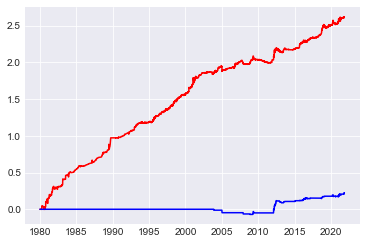

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [28]:
# Model Accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y, df['Predicted_Signal']))

Accuracy: 0.6173351330505207
